# Сборный проект 

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

## .     Изучение, подготовка и изменения  данных.

In [1]:
import pandas as pd # импортирем библиотеку pandas
import matplotlib.pyplot as plt #импортируем для работы с графиками
data=pd.read_csv("/datasets/games.csv")# прочитаем csv-файл


In [2]:
data # посмотрим в каком виде представлены данные

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
data.info()#получаем подробную информацию по датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.columns = data.columns.str.lower()#приведем названия столбцов к нижнему регистру 


array([[<AxesSubplot:title={'center':'year_of_release'}>,
        <AxesSubplot:title={'center':'na_sales'}>],
       [<AxesSubplot:title={'center':'eu_sales'}>,
        <AxesSubplot:title={'center':'jp_sales'}>],
       [<AxesSubplot:title={'center':'other_sales'}>,
        <AxesSubplot:title={'center':'critic_score'}>]], dtype=object)

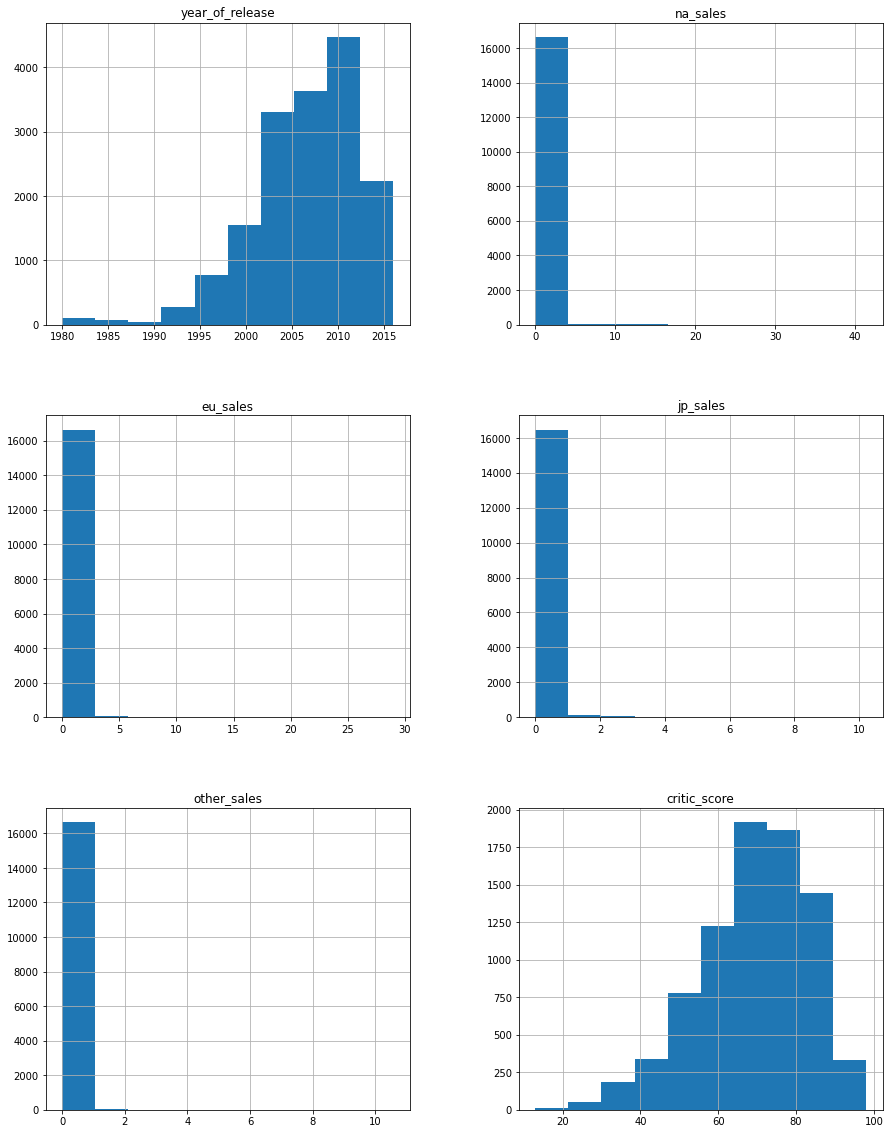

In [5]:
data.hist(figsize=(15, 20))#создам общую гистограмму для всех числовых столбцов таблицы.

In [6]:
data.duplicated().sum()#проверим наличие явных дупликатов

0

In [7]:
data.isna().sum()#смотрим общее кол-во пропусков и опрелделяем в каких колонках они находятся 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Данные с пропусками в имени и жанре удалим, т.к. их всего 2 штуки а эти данные нам будут нужны в полном объеме. Так же поменяем значения в столбцах (оценки пользователей и рейтинг) на INT.Удалим строки с отсутсвуеющими данными года релиза 

In [8]:
data=data.dropna(subset=['name'])
data=data.reset_index(drop=True)# удаляем строки где не указано название игры 

In [9]:
data=data.dropna(subset=['genre'])
data=data.reset_index(drop=True)# удаляем строки где не указан жанр игры 

In [10]:
data=data.dropna(subset=['year_of_release'])
data=data.reset_index(drop=True)# удаляем строки где отсутсвует год релиза

In [11]:
data.isna().sum()#смотрим общее кол-во пропусков и опрелделяем в каких колонках они находятся 

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [12]:
data.shape 

(16444, 11)

Данных после удаления осталось 98.3% , что в пределах нормы.


Посмотрим сколько значений в стобцах рейтинг, оценка критиков и оценка пользхователей равный 0.

In [13]:
len(data[(data['user_score']=="0")])

1

In [14]:
len(data[(data['critic_score']=="0")])

0

Пропуски в оценках сделаем 0 что будет означать что его нет. Так же поступим с пользовательской оценкой и оценкой критиков. Т.к. данных с 0 оценко  нет, что логично т.к. игры с полностью отсутсвующим рейтингом очень мало. Он может быть низким и стремиться к 0, но принять значение 0 может в очень редкис случаях. что мы и видит из данных.

Что касаеться рейтинга ESRB онлайн проектам не присваивается никакой  рейтинг. Онлайн-контент, общение в голосовом чате и пользовательский контент, не оцениваются ESRB, поскольку они не считаются частью процесса оценки.
Так же этот рейтинг актуален по большей части к Америке. Т.К. это не государсвенная организация и рейтинг в разных странах может отличаться либо не присваиваться вовсе.Заменим эти значения на 0.

In [15]:
data["critic_score"]=data["critic_score"].fillna(-1)# меняем пропуск на 0 что будет означать отсутсвие

In [16]:
data["user_score"]=data["user_score"].fillna(-1)# меняем пропуск на 0 что будет означать отсутсвие

In [17]:
data["rating"]=data["rating"].fillna(-1)# меняем пропуск на 0 что будет означать отсутсвие

Посмотрим какие есть уникальные значения в этих столбцах.


In [18]:
data["critic_score"].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [19]:
data["user_score"].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [20]:
data["rating"].unique()

array(['E', -1, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Значение tbd( означает что игра в процессе оценки) заменим на 0 т.к. их тоже нет.

In [21]:
import numpy as np

In [22]:
#for d in data["user_score"].unique():
    #data.loc[(data["user_score"]=='tbd')]=0
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan 
data['user_score'] = data['user_score'].fillna(-1)

In [23]:
# Комментарий ревьюера
data.loc[data["year_of_release"]==0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Поменяем значения в столбцах оценки пользователей на float. Так же поменяем на инт год выхода т.к кроме года не указывается месяц и день выхода, соответсвенно не имеет смысла менять их с помощью to_datetime.

In [24]:
len(data[data['user_score'] =="tbd"])

0

In [25]:
data["user_score"]=data["user_score"].astype("float64")

In [26]:
data["year_of_release"]=data["year_of_release"].astype("int")


In [27]:
data.info()#проверим 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Посчитаем сумарные продажи во всех регионах. 

In [28]:
data["sum_sales"]=data["na_sales"]+data["eu_sales"]+data["jp_sales"]+data["other_sales"]


In [29]:
data.describe()# посмотрим статистику всех числовых столбцов

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,32.979871,2.688081,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,36.302947,4.170124,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Посчитаем Строки с выходом игры в 0 году.

In [30]:
len(data[data['year_of_release'] == 0])

0

In [31]:

# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
name  : к

##  Исследовательский анализ данных

### Посмотрим  сколько копий игр было продано всего в каждый год. 

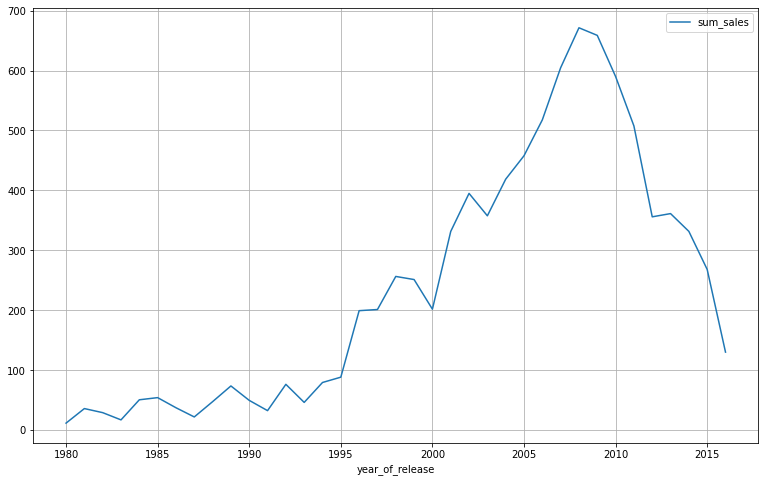

In [32]:
sum_sales_years = data.query('year_of_release> 1').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(grid=True, figsize=(13, 8))

In [33]:
sum_sales_years_1=data.query('year_of_release> 1').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
sum_sales_years_1.sort_values("year_of_release",ascending=False)


,sum_sales
year_of_release,
2016,129.94
2015,267.98
2014,331.53
2013,361.24
2012,355.84
2011,507.58
2010,590.13
2009,658.82
2008,671.50


 Как мы видим в 1996 году начинается резкое увеличение кол-ва проданых копий(больше чем в 2 раза) по сравнению с предыдущим. Стойкая положительная динамика наблюдается до 2008 года, в 2009 году начинается сильно снижение. Связано это скорее всего с ипотечным кризисом в США в 2008 году. Большое кол-во комнапний обонкротились, те кто остался на плаву пересмотрели политику и начали уменьшать кол-во выпускаемых проектов. Из-за этого некоторые игровые жанры "умерли". Так же примерно в это время срок разработок игр и затрат на них начал сильно увеличиваться. 

# Исходя из увиденного для анализа можно использовать не все данные, а только те где год выпуска больше или равно 1994 году. т.к. значения предыдущих лет слишком низкие. А чем больше данных тем более точными будут прогнозы и аналитика


### Посмотрите, как менялись продажи по платформам

#### Выберем самые популярные платформы

In [34]:
sum_sales_platform=data.query('year_of_release> 1996').pivot_table(index='platform', values='sum_sales', aggfunc='sum')
#сделаем сводную таблицу по сумме продаж копий игр на каждой платформе
sum_sales_platform.sort_values("sum_sales",ascending=False)

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,590.89
PS4,314.14
GBA,312.88
PSP,289.53


#### Рассмотрим продажи по годам первых 6 платформ самых популярных платформ.

Сначала рассмотри консоли PS т.к. 3 из них находятся в топ 6 по кол-ву проданных копий и являются приемниками друг друга.

<AxesSubplot:xlabel='year_of_release'>

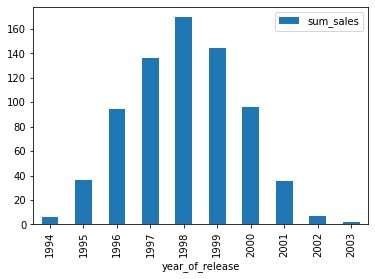

In [35]:
data.query('platform == "PS"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(kind='bar')

<AxesSubplot:xlabel='year_of_release'>

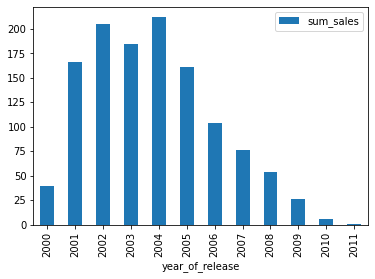

In [36]:
data.query('platform == "PS2"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(kind='bar')

<AxesSubplot:xlabel='year_of_release'>

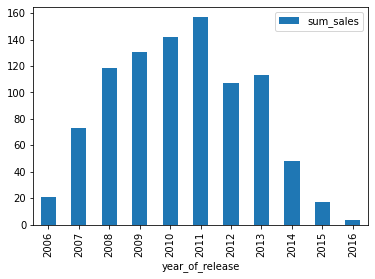

In [37]:
data.query('platform == "PS3"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(kind='bar')

Для боллее коректного анализа возьмем так же консоль PS4 не входящую в топ 6.

<AxesSubplot:xlabel='year_of_release'>

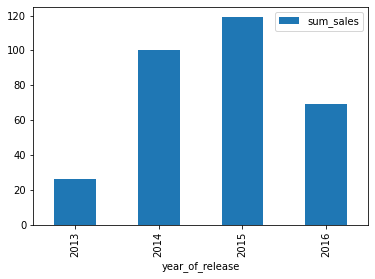

In [38]:
data.query('platform == "PS4"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(kind='bar')

В слуаях с Sony консоли нового поколения выпускаются раз в 6 лет. При этом видно в что в первый год выхода консоли нового поколения, предыдущее не сильно теряет своб актуальность. Т.к на консоль нового поколения выходит не так много игр. Разработчикам нужно время чтобы перейти на новую архитектуру консолей. Поэтому Самые лучше показатели продаж у консолей Sony приходились на 2-7 год существования консоли.

Вывод: Исходя из этих данных видно что консоли каждого поколения у Sony существуют примерно 10 лет. При этом первый год и последнии 3 большого количества продаж копий игр не будет. Однако в окне сущетсвования консоли 2-7 год будет максимальное кол-во проданных копий.Так же мы видим что консоль последнее поколения PS4 сейчас стремиться к своим пиковым значениям по продажам копий игр, на  16 год нельзя ссылаться на 100%  потому что данные за 16 год не полные.

Разберем оставшиеся платформы из топа.

<AxesSubplot:xlabel='year_of_release'>

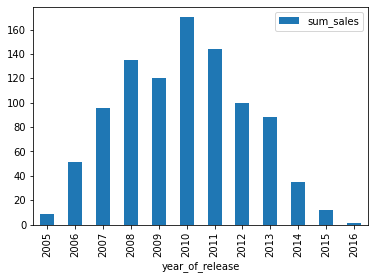

In [39]:
data.query('platform == "X360"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(kind='bar')

Вывод: также как и у Sony цикл жизни консоли примерно 10 лет. И так же как и sony пик проданных копий приходиться на окно 2-8 года сущетсвования консоли.

<AxesSubplot:xlabel='year_of_release'>

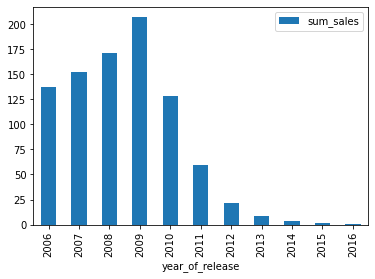

In [40]:
data.query('platform == "Wii"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(kind='bar')

Вывод:Как мы видим консоль так же была актуальна около 10 лет. Правда ее пик активности пришелся на первые 5 лет сущетсвования консоли , при этом пятый год был первым годом снижения кол-ва проданных копий.

<AxesSubplot:xlabel='year_of_release'>

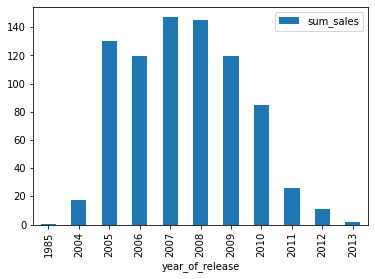

In [41]:

data.query('platform == "DS"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(kind='bar')

на данном графике мы видим аномальные значения в 1985 году. Не будем учитывать эти данные.

Вывод: актуальность консоли  составляет  10 лет.  Первый и последнии 2 года существования платформы показывают достаточно низкие показатели относительно их пиковых значений в интервале 2-8 года сущетсвования консоли.

# Вывод: На консоль продаются копии игр 10 лет . Самое большое кол-во копий приносят 2-7 год существования консоли. Дальше у всех рассмотренных платформ снижается кол-во. 

#### Рассмотрим данные для платформ за полседние 3 года включая 13 год  и сравним.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно выбран актуальный период. 👍 Сейчас в наше динамичное время в бизнесе уже используются для прогноза периоды в 2-3 года.</font>

In [42]:
actual_data=data.query('year_of_release > 2012')#сделаем срез актуальных данных


Рассмотрим продажи относительно платформ.

<AxesSubplot:xlabel='platform'>

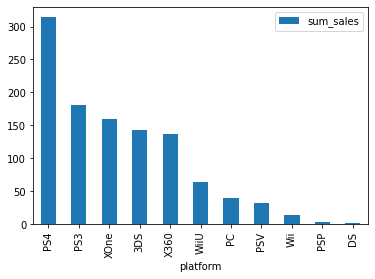

In [43]:
actual_data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values('sum_sales', ascending=False).plot(kind='bar')

Как мы видим самые популярные платформы это платформы главных конкурентов. Sony с их PS4 и Xbox c XOne. 
Из графиков выше помним что PS3 Уже заканчивает свой пиковый цикл и идет на спад. т.к вышла более актуальная и свежая модель Ps4.


Разберем пободробнее продажи топовых платформ  . Платформы PS3 разбирать не будем  т.к. она неактуальная модель закнчивающая свой жизненный цикл и PS4 т.к она уже разобрана выше. Так же не будем разбирать платформу X360 по той же причине.

<AxesSubplot:xlabel='year_of_release'>

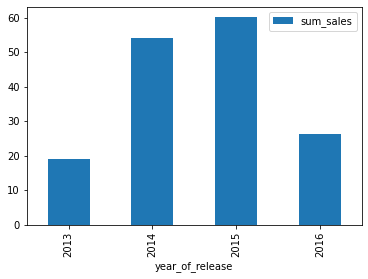

In [44]:
actual_data.query('platform == "XOne"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(kind='bar')

Как мы видим как в и в случае с PS4 Платформа XOne являеться платформой нового поколения. Пришедшей на смену x360.Исходя из выводов сделаных выше
она еще приблизительно 3-4 года будет находиться на пике своих возможностей по продажам копий игр. Платформу x360 не будем рассматривать из-за ее неактуальнности.

<AxesSubplot:xlabel='year_of_release'>

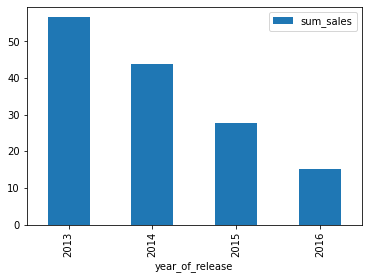

In [45]:
actual_data.query('platform == "3DS"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(kind='bar')

Посмотрим график продаж данной платформы за все время.Есть предположение что платформа подходит к концу своего жизнено цикла.

<AxesSubplot:xlabel='year_of_release'>

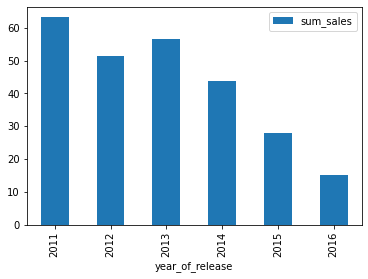

In [46]:
data.query('platform == "3DS"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(kind='bar')

В 2017 году у консоли будет 7 год ее сущетсвования, в ближайшие 1-2 года она станет полностью не актуальной.

<AxesSubplot:xlabel='year_of_release'>

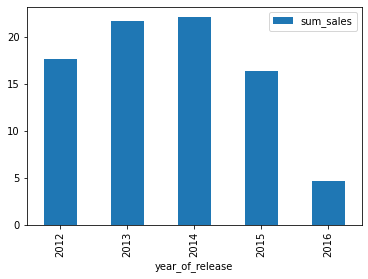

In [47]:
data.query('platform == "WiiU"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(kind='bar')

Так же рассмотрим PC

<AxesSubplot:xlabel='year_of_release'>

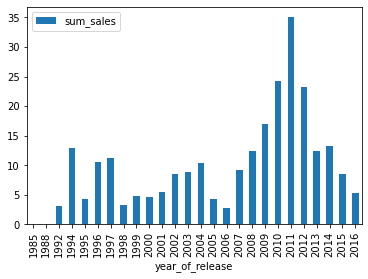

In [48]:
data.query('platform == "PC"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(kind='bar')

Кол-во проданых копий у PC значительно ниже чем у других топовых платформ однако у пс срок акутальности не заканчивается, и данна платформа актуально всегда. 

# Вывод : На данный момент самые акутальные плафтормы это PS4, XOne и WiiU и Pc. При этом идет общая тендеция для всех платформ на снижения кол-ва проданых копий с каждым годом. 

### Построим график "ящик с усами". По общим продажам игр по акутальным платформам  платформам за актуальынй период.

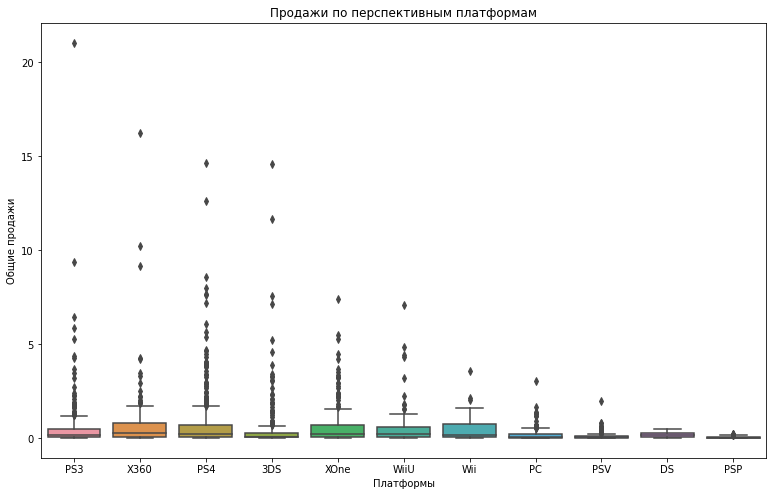

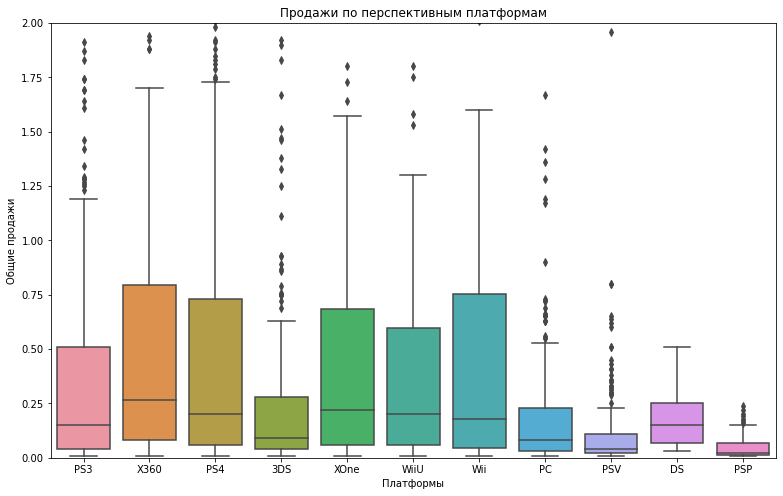

In [50]:

import seaborn as sns
data_temp, y = actual_data.copy(), 'sum_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

#### Вывод: Как видно из графика на всех 4 платформах есть болшие выбросы , связанно это скорее всего со сверх популярными играми.

### Посмотри как влияют оценки критиков и пользователей на кол-во проданых копий внутри платформ.

In [51]:
ps4_critic= actual_data.query('platform == "PS4" and critic_score > -1') 
ps4_user= actual_data.query('platform == "PS4" and user_score > -1') 
pc_critic= actual_data.query('platform == "PC" and critic_score > -1 ') 
pc_user=actual_data.query('platform == "PC" and user_score > -1 ')
wiiu_critic= actual_data.query('platform == "WiiU" and critic_score > -1 ') 
wiiu_user= actual_data.query('platform == "WiiU" and user_score > -1 ') 
xone_critic= actual_data.query('platform == "XOne" and critic_score > -1 ') 
xone_user= actual_data.query('platform == "XOne" and user_score > -1 ') 



Посчитаем кореляцию пар проданные копии-оценка критиков и проданные копии- оценка пользователей.

#### Вывод. Кореляци пар слишком низкая чтобы можно было утвержать что оценки критиков и пользователей влияют на продажи. Однако если оценка от критиков больше 90 кол-во проданых копий будет большими.

 Посчитаем кореляцию пар проданные копии-оценка критиков и проданные копии- оценка пользователей.

 Посмотрим графики и посчитаем кореляцию по другим платформам по другим платформам

Кореляция пары проданные копии-оценка критиков PS4
0.406567902061781
Кореляция пары проданные копии-оценка пользователей PS4
-0.031957110204556376


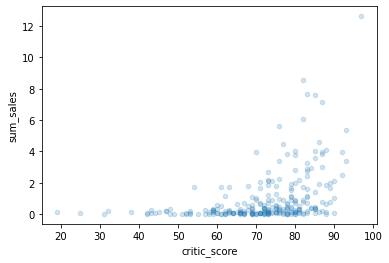

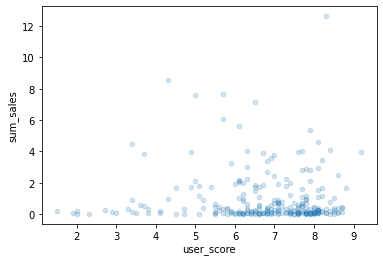

In [57]:
ps4_critic.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.2)
print("Кореляция пары проданные копии-оценка критиков PS4")
print(ps4_critic['sum_sales'].corr(ps4_critic['critic_score']))
ps4_user.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.2)
print("Кореляция пары проданные копии-оценка пользователей PS4" )
print(ps4_user['sum_sales'].corr(ps4_user['user_score']))


Кореляция пары проданные копии-оценка критиков PS4
0.3586664814609293
Кореляция пары проданные копии-оценка пользователей PS4
0.4193304819266187


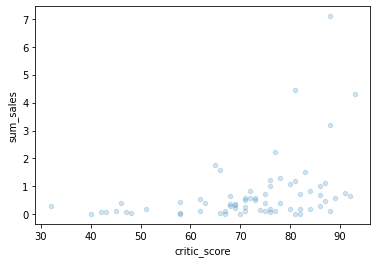

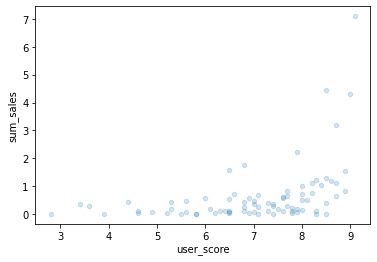

In [58]:
wiiu_critic.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.2)
print("Кореляция пары проданные копии-оценка критиков PS4")
print(wiiu_critic['sum_sales'].corr(wiiu_critic['user_score']))
wiiu_user.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.2)
print("Кореляция пары проданные копии-оценка пользователей PS4" )
print(wiiu_user['sum_sales'].corr(wiiu_user['user_score']))


Кореляция пары проданные копии-оценка критиков xone
0.0010791571372793945
Кореляция пары проданные копии-оценка пользователей xone
-0.06892505328279412


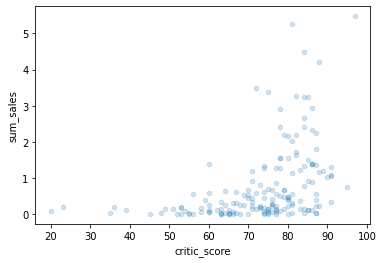

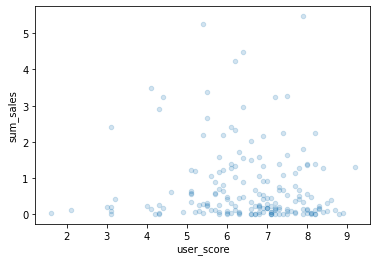

In [59]:
xone_critic.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.2)
print("Кореляция пары проданные копии-оценка критиков xone")
print(xone_critic['sum_sales'].corr(xone_critic['user_score']))
xone_user.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.2)
print("Кореляция пары проданные копии-оценка пользователей xone" )
print(xone_user['sum_sales'].corr(xone_user['user_score']))


Кореляция пары проданные копии-оценка критиков PS4
-0.08956264686921601
Кореляция пары проданные копии-оценка пользователей PS4
-0.09384186952476739


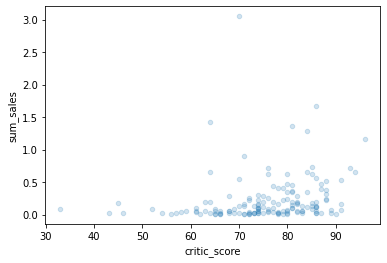

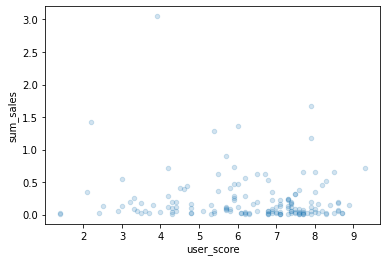

In [60]:
pc_critic.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.2)
print("Кореляция пары проданные копии-оценка критиков PS4")
print(pc_critic['sum_sales'].corr(pc_critic['user_score']))
pc_user.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.2)
print("Кореляция пары проданные копии-оценка пользователей PS4" )
print(pc_user['sum_sales'].corr(pc_user['user_score']))


**Вывод**: Сильной  зависимоти от оценок пользоватейлей и критиков нет, значения корреляции слишком низкие

### Посмотрим на общее распределие игр по жанрам.

<AxesSubplot:xlabel='genre'>

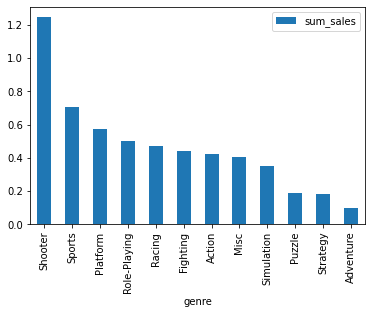

In [62]:
actual_data.pivot_table(index='genre', values='sum_sales', aggfunc='mean').sort_values('sum_sales', ascending=False).plot(kind='bar')

# Из данного графика видим, что самыми популярными жанрами игр будут в  Экшн-игры, Шутеры, Спорт, Рпг. При этом остальные жанры больше чем в 2 раза уступаю самому маленькому жанру из топ 4 РПГ.

 **Вывод:** самые популярные жанры Шутеры, Спорт и Платформеры 

##  Составление  портрета  пользователя каждого региона.

### Посмотрим доли продаж на рынках Европы, Японии и Америки топ 5 актуальный платформ  за актуальный период, определенных выше

Посмотрим сумарные продажи по 3 регионам за актуальный период.

In [63]:
top_platform_actual=actual_data.query('platform == "PS4" or platform == "PS3" or platform == "3DS" or platform == "XOne" or platform == "X360" and year_of_release > 2012 ')

<AxesSubplot:ylabel='na_sales'>

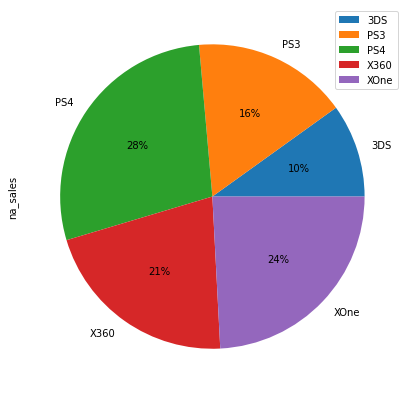

In [65]:

top_platform_actual_na=top_platform_actual[["na_sales","platform"]]#Возьмем данные нужные нам для построение круговой диаграмы
top_platform_actual_na.groupby(['platform']).sum().plot(kind='pie', y='na_sales',autopct='%1.0f%%',figsize= (7, 7))# построим круговую диаграму

<AxesSubplot:ylabel='eu_sales'>

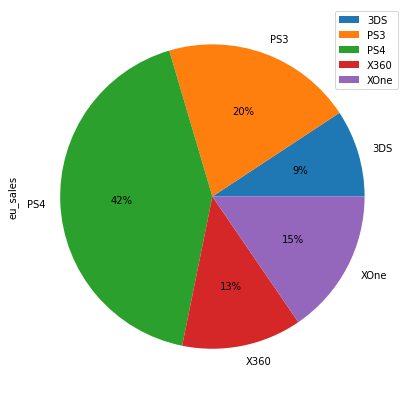

In [66]:
top_platform_actual_eu=top_platform_actual[["eu_sales","platform"]]
top_platform_actual_eu.groupby(['platform']).sum().plot(kind='pie', y='eu_sales',autopct='%1.0f%%',figsize= (7, 7))# построим круговую диаграму

<AxesSubplot:ylabel='jp_sales'>

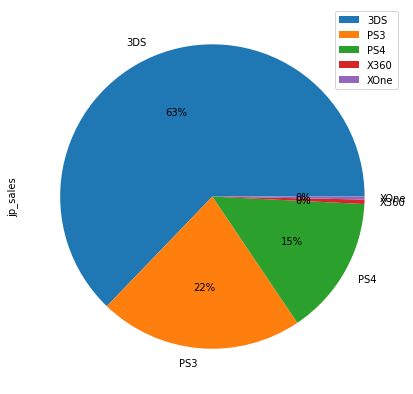

In [67]:
top_platform_actual_jp=top_platform_actual[["jp_sales","platform"]]
top_platform_actual_jp.groupby(['platform']).sum().plot(kind='pie', y='jp_sales',autopct='%1.0f%%',figsize= (7, 7))# построим круговую диаграму

### Посмотрим препочтения покупателей по жанрам в 3 регионах

<AxesSubplot:ylabel='na_sales'>

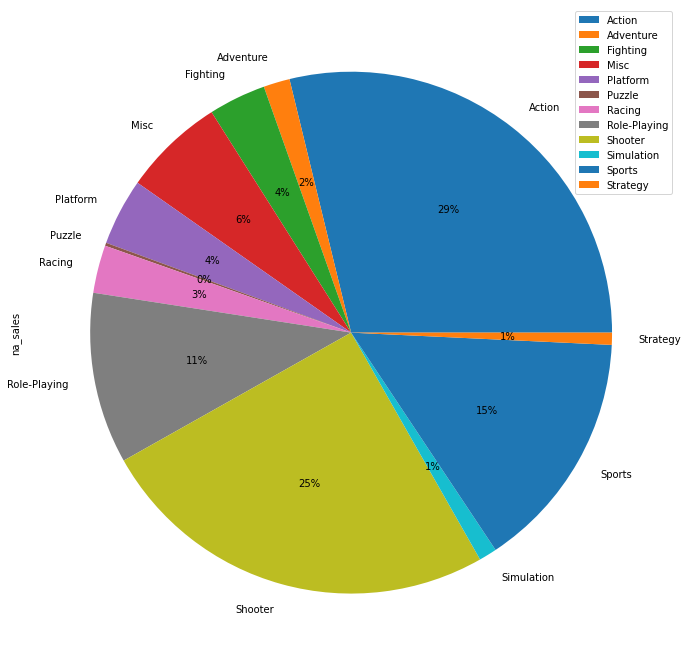

In [70]:
top_genre_actual_na=actual_data[["na_sales","genre",]]#Возьмем данные нужные нам для построение круговой диаграмы
top_genre_actual_na.groupby(['genre']).sum().plot(kind='pie', y='na_sales',autopct='%1.0f%%',figsize= (12, 12))# построим круговую диаграму

<AxesSubplot:ylabel='eu_sales'>

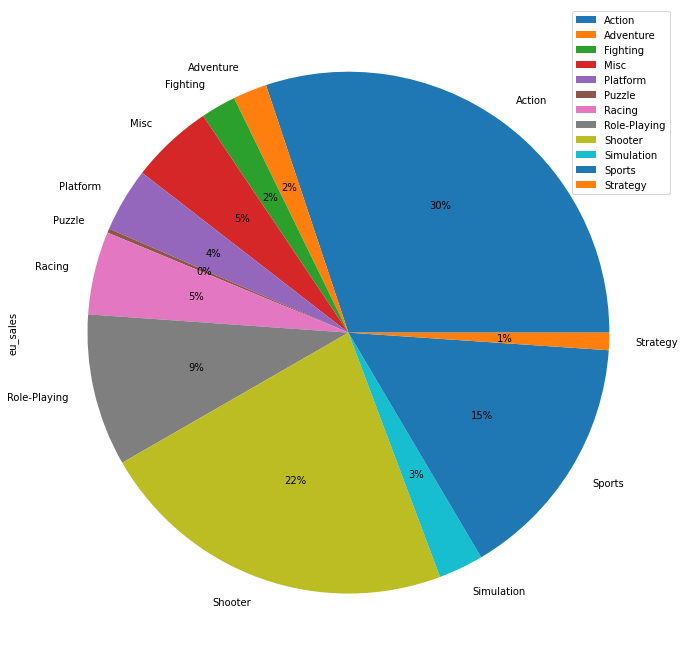

In [71]:
top_genre_actual_eu=actual_data[["eu_sales","genre"]]#Возьмем данные нужные нам для построение круговой диаграмы
top_genre_actual_eu.groupby(['genre']).sum().plot(kind='pie', y='eu_sales',autopct='%1.0f%%',figsize= (12, 12))# построим круговую диаграму

<AxesSubplot:ylabel='jp_sales'>

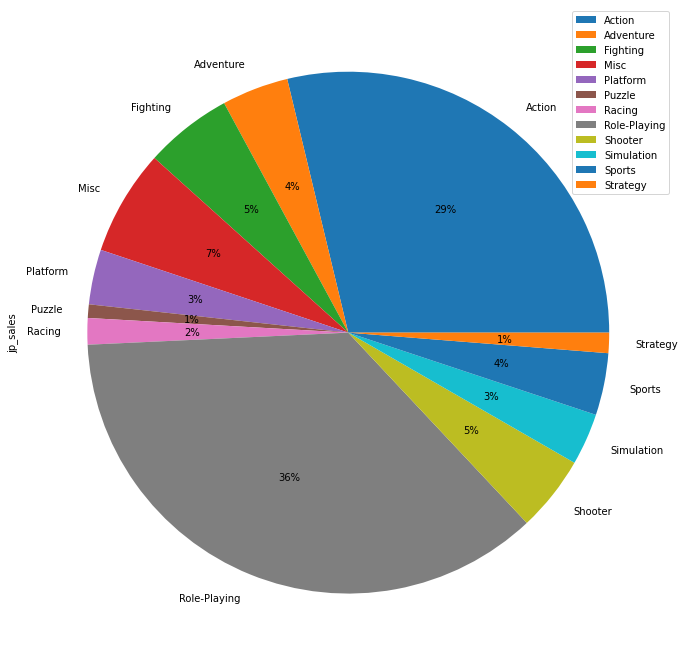

In [72]:
top_genre_actual_jp=actual_data[["jp_sales","genre"]]#Возьмем данные нужные нам для построение круговой диаграмы
top_genre_actual_jp.groupby(['genre']).sum().plot(kind='pie', y='jp_sales',autopct='%1.0f%%',figsize= (12, 12))# построим круговую диаграму

# Как мы видим из данных. В Америке и Европе самыми популярными жанрами являются ЭКШН игры и Шутеры , топ 3 закрывают игры жанра спорт. Однако в Японии опять другие предпочтения. На первом месте по популярности у них Экш игры, на втором РПГ и топ 3 закрывают игры жанра Шутеры.

### Оценим влияет ли рейтинг на продажи в отдельном регионе ESRB

<AxesSubplot:ylabel='jp_sales'>

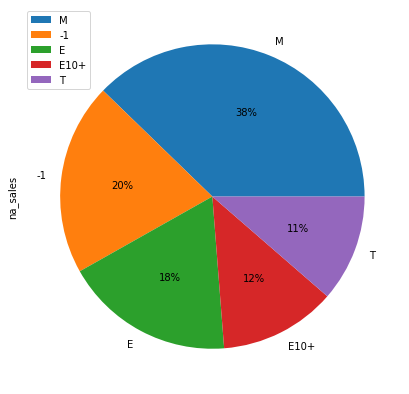

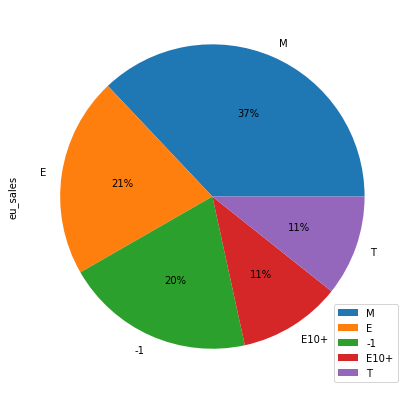

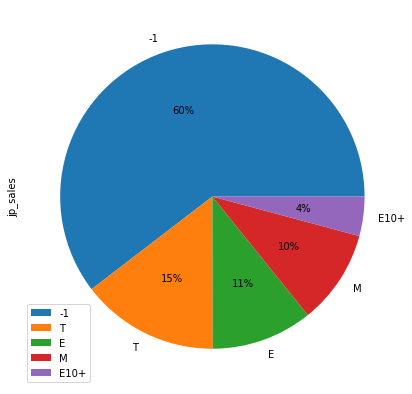

In [73]:
actual_data.pivot_table(index='rating', values="na_sales", aggfunc='sum').sort_values("na_sales", ascending=False).plot(kind='pie', y="na_sales", autopct='%1.0f%%', figsize=(7, 7))
actual_data.pivot_table(index='rating', values="eu_sales", aggfunc='sum').sort_values("eu_sales", ascending=False).plot(kind='pie', y="eu_sales", autopct='%1.0f%%', figsize=(7, 7))
actual_data.pivot_table(index='rating', values="jp_sales", aggfunc='sum').sort_values("jp_sales", ascending=False).plot(kind='pie', y="jp_sales", autopct='%1.0f%%', figsize=(7, 7))

Как мы видим игр графиков на Американском и европейском рынке пользователи отдают предпочтение играм с рейтингом "M". Дальше по полуряности идут "M" .В Японии пердпочитают игры с рейтингом "T" ,  отсутсвует рейтинг у  большого числа игр это связано с тем что в Японии есть своя компания занимающаясе присвоением рейтинга Computer Entertainment Rating Organization. 

#### Общий вывпод по регионам: Американский и Европейский рынок очень похожи по предпочтениям На обоих рынках самыми популярными платформами являются PC, PS4 и XOne , покупатели этих 2 регионов предпочитают игры в жанре "Экш", "Шутер" и игры жанра "Спорт" с рейтингом "M" («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. . Японский регион отличается особыми вкусами, платформы они предпочитают отчественные PSV, PS4 и WiiU. Жанры предпочитают игры в жанре Экш, Рпг и шутеры. Влияние рейтинга на это регион сложно оценить достоверно. Изходя из имеющихся данных предпочитают игры с рейтингом "Т", однако это всего 18%. 41% данных отсутсвует т.к. в японии присвоением рейтинга занимается "Computer Entertainment Rating Organization". Для более точного анализа нужны дополнительные данные.


### Сформулируем гиппотезы и проверим их. 

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем основную и альтернативную гипотизы 

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.



#### Проверим их 

In [74]:
from scipy import stats as st


In [77]:
# results = вызов метода для проверки гипотезы
alpha = .05

results = st.ttest_ind(
    xone_user['user_score'],
    pc_user['user_score'],  
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


In [78]:
print("Cредняя оценка пользователей Xbox " , xone_user['user_score'].mean())
print("Cредняя оценка пользователей PC" , pc_user['user_score'].mean())

Cредняя оценка пользователей Xbox  6.521428571428572
Cредняя оценка пользователей PC 6.2696774193548395


#### Вывод: Не смотря на то что средние оценки пользователей по платформам различаются , вероятность получить такое значение очень низкое (14%). Отвергнуть нулевыую гипотезу мы не можем. Следовательно нулевая гипотеза верна.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем основную и альтернативную гипотизы

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1: Средние пользовательские рейтинги жанров Action и Sports различаются.

#### Проверим их 

In [79]:
action=actual_data.query("genre == 'Action' and user_score > -1")# готови данные для проверки гипотезы так как user_score=0 означает что оценка отсутсвует 

In [80]:
sports=actual_data.query("genre == 'Sports' and user_score > -1")# готови данные для проверки гипотезы так как user_score=0 означает что оценка отсутсвует 

In [81]:
# results = вызов метода для проверки гипотезы
alpha = .05

results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],  
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


In [82]:
print("Cредняя оценка жанра Action " , action['user_score'].mean())
print("Cредняя оценка пользователей Sprot" , sports['user_score'].mean())

Cредняя оценка жанра Action  6.837532133676092
Cредняя оценка пользователей Sprot 5.238124999999999


#### Вывод: Средние пользовательские оценки  различаются. Вероятность случайно получить одинаковые результаты очень мало . Следовательно, cредние пользовательские рейтинги жанров Action и Sports  различаются и наша гипотеза подтвердилась.

При использовании t-критерия Стьюдента важно, чтобы объекты исследования или анализируемые выборки были распределены равномерно и имели хотя бы минимальное взаимодействие: относились к одной и той же среде. t-критерий Стьюдента лучше всего использовать в случаях, когда известны средние значения выборки. Например, эксперт намерен проанализировать средний возраст жителей Сибири и средний возраст россиян по стране.

# Общий вывод:

В 2009 году начался спад продаж во всей индустрии, и динамика продолжается до сих пор.

На данный момент платформы сменяют друг друга в среднем раз в 10 лет. Однако это зависит от конкуренции. 

Оценки критиков и игроков не влияют напрямую на кол-во продаваемых копий. Однако игры с рейтингом критиков больше 90 продаются лучше всего.

Саммые популярные платформы за все время :  PS2, X360, PS3, Wii, DS.

Самые популярные актуальные платформы это: PS4, XOne, WiiU, PC.

Самые популярные Жанры в мире  это : Action, Shooters и Sport. 

Самые популярные Жанры в мире это : Шутеры, Спорт и Платформеры 

Покупатели в Европе и Америке предпочитают играть на консолях PS3 ,PS4, XOne. В игры в жанре Action, Shooters и Sport ,  с рейтингом "М" от "Entertainment Software Rating Board" . При подборе игры и консолей для этих регионов в первую очень стоит обращать внимание именно на эти параметры.

Покупатели в Японии предпочитают предпочитают играть на консолях 3DS,PS4 и Ps3. В игры в жанре Action, RPG  , с рейтингом "T" от Entertainment Software Rating Board. Так же ,дополнительно, имеемт смысл проанализировать японский рынок отдельно, в случае жалние допольнительного расширения влияния на этом рынке. т.к. в связи с культурными особенностями их предпочтения отличают от Европы и Америки и они имеют свою организаци занимающейся оценкой рейтинга "Computer Entertainment Rating Organization". . При подборе игры и консолей для этих регионов в первую очень стоит обращать внимание именно на эти параметры.

 Рекомендуется добавить дополнительную информация по онлайн играм. По играм в жанрах которые здесь не указаны MMORPG, MOBA.Эти жанры относительно довольно популярны во всем мире.